# Exploratory Data Analysis

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load and filter

In [29]:
# Data source: https://covid.ourworldindata.org/data/owid-covid-data.csv
df = pd.read_csv("raw_data/owid-covid-data.csv", parse_dates=["date"])

In [75]:
# Select only Africa
df = df[(df.continent == "Africa") | (df.iso_code == "OWID_AFR")]
df = df.rename(columns={"location": "country"})

# Remove small countries (Saint Helena)
df = df[~(df.population < 10_000)]

# Remove Mayotte
df = df[df.country != "Mayotte"]

# Select only timeframe
df = df[df.date < "2021-11"]
df = df["2020-11" < df.date]

In [76]:
df.country.unique()

array(['Africa', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'Chad', 'Comoros', 'Congo', 'Ivory Coast', 'DR Congo', 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Swaziland', 'Ethiopia',
       'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'La Reunion', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
       'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [64]:
# Change country names to make data coherent
df.country = ["DR Congo" if i == "Democratic Republic of Congo" else i for i in df.country]
df.country = ["Ivory Coast" if i == "Cote d'Ivoire" else i for i in df.country]
df.country = ["Swaziland" if i == "Eswatini" else i for i in df.country]
df.country = ["La Reunion" if i == "Reunion" else i for i in df.country]

"Democratic Replublic of Congo" -> "DR Congo"

"Cote d'Ivoire" -> "Ivory Coast"

"Eswatini" -> "Swaziland" ?

"Reunion" -> "La Reunion" ?

Change order of Sudan and South Sudan

Western Sahara non existing in OWID?

In [28]:
df

,iso_code,continent,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1556,OWID_AFR,NaN,Africa,2020-11-02,1807566.0,9998.0,10722.143,44687.0,174.0,200.714,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1557,OWID_AFR,NaN,Africa,2020-11-03,1815556.0,7990.0,10820.857,44865.0,178.0,201.714,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1558,OWID_AFR,NaN,Africa,2020-11-04,1826655.0,11099.0,10818.714,45124.0,259.0,192.000,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1559,OWID_AFR,NaN,Africa,2020-11-05,1840303.0,13648.0,11275.000,45591.0,467.0,237.000,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1560,OWID_AFR,NaN,Africa,2020-11-06,1856092.0,15789.0,12002.714,45827.0,236.0,251.000,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316092,ZWE,Africa,Zimbabwe,2021-10-27,132724.0,36.0,41.000,4674.0,1.0,2.143,...,30.7,36.791,1.7,61.49,0.571,1.632054e+07,NaN,NaN,NaN,NaN
316093,ZWE,Africa,Zimbabwe,2021-10-28,132808.0,84.0,45.857,4675.0,1.0,2.143,...,30.7,36.791,1.7,61.49,0.571,1.632054e+07,NaN,NaN,NaN,NaN
316094,ZWE,Africa,Zimbabwe,2021-10-29,132880.0,72.0,48.571,4675.0,0.0,1.857,...,30.7,36.791,1.7,61.49,0.571,1.632054e+07,NaN,NaN,NaN,NaN
316095,ZWE,Africa,Zimbabwe,2021-10-30,132926.0,46.0,48.286,4675.0,0.0,1.714,...,30.7,36.791,1.7,61.49,0.571,1.632054e+07,NaN,NaN,NaN,NaN


## Data analysis

In [9]:
# Sample country
df[df.iso_code == "ZWE"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
305115,ZWE,Africa,Zimbabwe,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
305116,ZWE,Africa,Zimbabwe,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
305117,ZWE,Africa,Zimbabwe,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
305118,ZWE,Africa,Zimbabwe,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
305119,ZWE,Africa,Zimbabwe,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306320,ZWE,Africa,Zimbabwe,2023-04-22,264632.0,2.0,3.571,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
306321,ZWE,Africa,Zimbabwe,2023-04-23,264637.0,5.0,3.857,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
306322,ZWE,Africa,Zimbabwe,2023-04-24,264639.0,2.0,3.714,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
306323,ZWE,Africa,Zimbabwe,2023-04-25,264639.0,0.0,3.714,5685.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [11]:
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [5]:
df.date.unique()

array(['2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', ...,
       '2023-04-30T00:00:00.000000000', '2023-05-01T00:00:00.000000000',
       '2023-05-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [103]:
df[["iso_code", "new_people_vaccinated_smoothed", "new_vaccinations_smoothed"]]

,iso_code,new_people_vaccinated_smoothed,new_vaccinations_smoothed
3934,DZA,NaN,NaN
3935,DZA,NaN,NaN
3936,DZA,NaN,NaN
3937,DZA,NaN,NaN
3938,DZA,NaN,NaN
...,...,...,...
305778,ZWE,6536.0,14569.0
305779,ZWE,6355.0,14241.0
305780,ZWE,6505.0,14184.0
305781,ZWE,6439.0,14130.0


In [71]:
df[df.iso_code == "SOM"]#.new_people_vaccinated_smoothed

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
252234,SOM,Africa,Somalia,2020-11-02,3941.0,0.0,0.000,104.0,0.0,0.000,...,NaN,9.831,0.9,57.4,NaN,17597508.0,NaN,NaN,NaN,NaN
252235,SOM,Africa,Somalia,2020-11-03,3941.0,0.0,0.000,104.0,0.0,0.000,...,NaN,9.831,0.9,57.4,NaN,17597508.0,NaN,NaN,NaN,NaN
252236,SOM,Africa,Somalia,2020-11-04,4229.0,288.0,41.143,107.0,3.0,0.429,...,NaN,9.831,0.9,57.4,NaN,17597508.0,NaN,NaN,NaN,NaN
252237,SOM,Africa,Somalia,2020-11-05,4229.0,0.0,41.143,107.0,0.0,0.429,...,NaN,9.831,0.9,57.4,NaN,17597508.0,NaN,NaN,NaN,NaN
252238,SOM,Africa,Somalia,2020-11-06,4229.0,0.0,41.143,107.0,0.0,0.429,...,NaN,9.831,0.9,57.4,NaN,17597508.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252593,SOM,Africa,Somalia,2021-10-27,21998.0,0.0,104.143,1208.0,0.0,4.000,...,NaN,9.831,0.9,57.4,NaN,17597508.0,NaN,NaN,NaN,NaN
252594,SOM,Africa,Somalia,2021-10-28,21998.0,0.0,104.143,1208.0,0.0,4.000,...,NaN,9.831,0.9,57.4,NaN,17597508.0,NaN,NaN,NaN,NaN
252595,SOM,Africa,Somalia,2021-10-29,21998.0,0.0,104.143,1208.0,0.0,4.000,...,NaN,9.831,0.9,57.4,NaN,17597508.0,NaN,NaN,NaN,NaN
252596,SOM,Africa,Somalia,2021-10-30,21998.0,0.0,104.143,1208.0,0.0,4.000,...,NaN,9.831,0.9,57.4,NaN,17597508.0,NaN,NaN,NaN,NaN


In [69]:
df.groupby(by="iso_code").continent.count()

iso_code
AGO    364
BDI    364
BEN    364
BFA    364
BWA    364
CAF    364
CIV    364
CMR    364
COD    364
COG    364
COM    364
CPV    364
DJI    364
DZA    364
EGY    364
ERI    364
ETH    364
GAB    364
GHA    364
GIN    364
GMB    364
GNB    364
GNQ    364
KEN    364
LBR    364
LBY    364
LSO    364
MAR    364
MDG    364
MLI    364
MOZ    364
MRT    364
MUS    364
MWI    364
MYT    364
NAM    364
NER    364
NGA    364
REU    364
RWA    364
SDN    364
SEN    364
SLE    364
SOM    364
SSD    364
STP    364
SWZ    364
SYC    364
TCD    364
TGO    364
TUN    364
TZA    364
UGA    364
ZAF    364
ZMB    364
ZWE    364
Name: continent, dtype: int64

In [81]:
temp = df.isna()
temp["iso_code"] = df.iso_code
temp = temp.groupby(by="iso_code").sum()
temp["totalNA"] = temp.sum(axis=1)
temp.sort_values(ascending=False, by="totalNA").head(10)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,totalNA
iso_code,,,,,,,,,,,,,,,,,,,,,
MYT,0,0,0,0,1,1,0,0,0,0,...,364,364,0,364,0,312,312,312,312,16904
REU,0,0,0,0,0,0,0,0,0,0,...,364,364,0,364,0,312,312,312,312,16900
ERI,0,0,0,0,0,0,51,0,0,0,...,364,0,0,0,0,364,364,364,364,13570
SOM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,364,0,364,364,364,364,13180
GNB,0,0,0,0,0,0,0,0,0,0,...,0,364,0,0,0,364,364,364,364,13070
BDI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,364,364,364,364,13030
TCD,0,0,0,0,0,0,0,0,0,0,...,0,364,0,0,0,364,364,364,364,12754
CAF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,364,364,364,364,12721
AGO,0,0,0,0,0,0,0,0,0,0,...,0,364,0,0,0,364,364,364,364,12650


<Axes: ylabel='iso_code'>

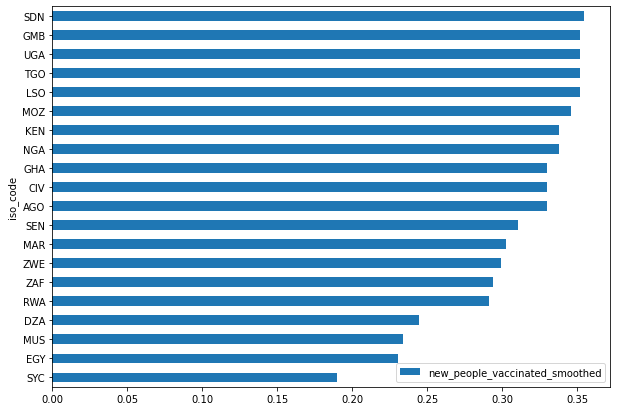

In [89]:
plt.rcParams["figure.figsize"] = (10,7)
temp = df.isna()
temp["iso_code"] = df.iso_code
temp = temp.groupby(by="iso_code").sum() / 364
temp["totalNA"] = temp.sum(axis=1)
temp.sort_values(ascending=True, by="new_people_vaccinated_smoothed").head(20)[["new_people_vaccinated_smoothed"]].plot.barh()

In [13]:
# Only relevant for 
df[df.continent.isna()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


In [27]:
# small_countries = ["SHN", # Saint Helena, 5,633
#                    "PCN", # Pitcairn Islands, 47
#                    "VAT", # Vatican, 453
#                    "TKL", # Tokelau, 1,499
#                    "FLK", # Falkland Islands, 3,662
#                    ]
# df.iso_code.isin(small_countries)

In [26]:
# Exklude very small countries
df[df.population < 1_000_000].groupby("iso_code").nth(0)[["continent", "country", "population"]]

,continent,country,population
iso_code,,,
COM,Africa,Comoros,836783.0
CPV,Africa,Cape Verde,593162.0
MYT,Africa,Mayotte,326113.0
REU,Africa,Reunion,974062.0
SHN,Africa,Saint Helena,5401.0
STP,Africa,Sao Tome and Principe,227393.0
SYC,Africa,Seychelles,107135.0


In [15]:
# Drop very small countries
df = df[df.population > 6000]

Text(0.5, 0, 'Percent of NA values')

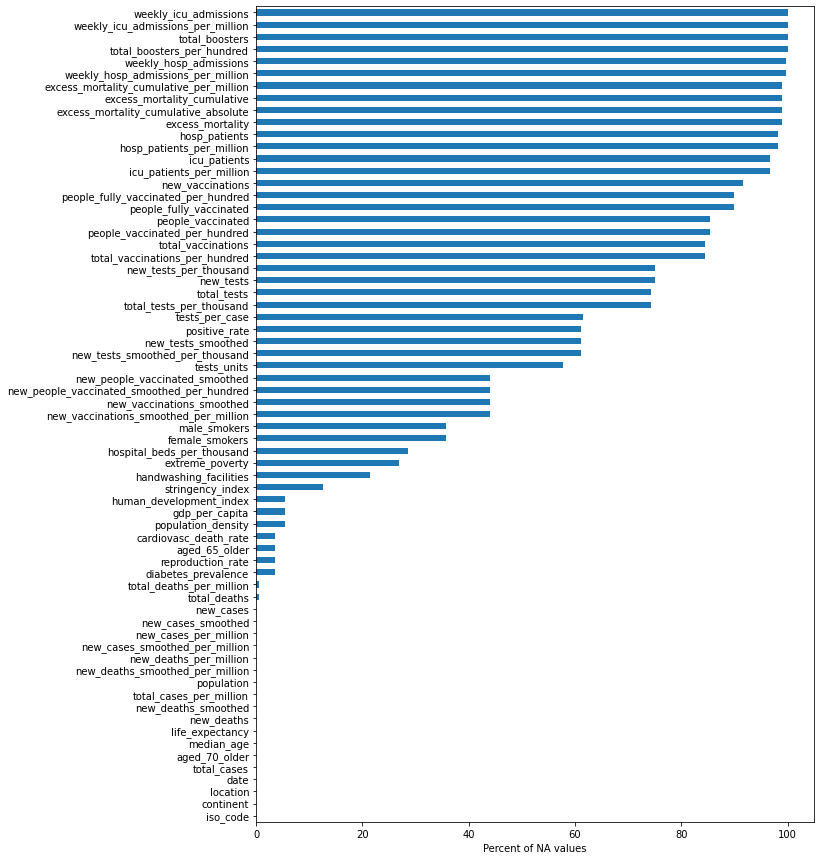

In [56]:
# Analyse NAs
plt.rcParams["figure.figsize"] = (10,15)
#na_df = df[["iso_code", "continent", "date", "location", "life_expectancy", "population", ""]]
na_df = df.isna().sum() / df.shape[0] * 100
na_df.sort_values(ascending=True).plot.barh()
plt.xlabel("Percent of NA values")

<ipython-input-101-e13beb88a45b>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp2 = df.groupby(by="iso_code").sum()[[y_label]]


<Axes: xlabel='handwashing_facilities', ylabel='new_people_vaccinated_smoothed_per_hundred'>

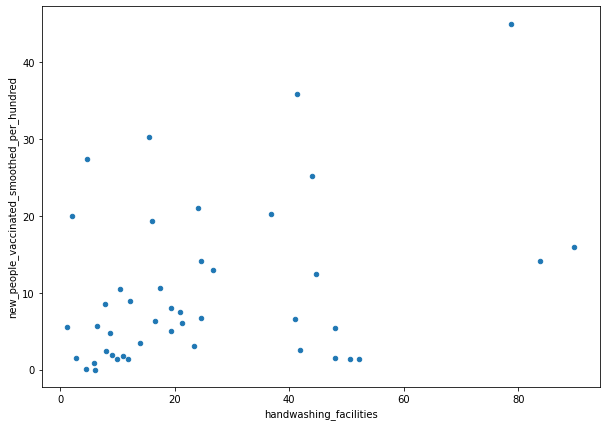

In [101]:
#indicator = "extreme_poverty" 
#indicator = "human_development_index"
indicator = "handwashing_facilities"


y_label = "new_people_vaccinated_smoothed_per_hundred"
#y_label = "new_cases_per_million"

plt.rcParams["figure.figsize"] = (10,7)
temp2 = df.groupby(by="iso_code").sum()[[y_label]] 
temp2 = temp2.join(df.groupby(by="iso_code").nth(0)[[indicator]])
temp2.plot.scatter(x=indicator, y=y_label)
#temp2

In [121]:
df[(df.date == "2021-10-01") & (df.population > 10_000_000)]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
4267,DZA,Africa,Algeria,2021-10-01,203359.0,161.0,153.714,5812.0,7.0,9.143,...,30.4,83.741,1.90,76.88,0.748,44903228.0,NaN,NaN,NaN,NaN
7897,AGO,Africa,Angola,2021-10-01,57247.0,664.0,486.714,1548.0,11.0,12.571,...,NaN,26.664,NaN,61.15,0.581,35588996.0,NaN,NaN,NaN,NaN
28499,BEN,Africa,Benin,2021-10-01,23890.0,0.0,133.143,159.0,0.0,0.714,...,12.3,11.035,0.50,61.77,0.545,13352864.0,NaN,NaN,NaN,NaN
41815,BFA,Africa,Burkina Faso,2021-10-01,14290.0,28.0,22.714,187.0,3.0,1.000,...,23.9,11.877,0.40,61.58,0.452,22673764.0,NaN,NaN,NaN,NaN
43025,BDI,Africa,Burundi,2021-10-01,18410.0,139.0,157.714,14.0,0.0,0.000,...,NaN,6.144,0.80,61.58,0.433,12889583.0,NaN,NaN,NaN,NaN
45445,CMR,Africa,Cameroon,2021-10-01,95399.0,0.0,442.286,1517.0,0.0,8.286,...,NaN,2.735,1.30,59.29,0.563,27914542.0,NaN,NaN,NaN,NaN
51495,TCD,Africa,Chad,2021-10-01,5038.0,1.0,1.000,174.0,0.0,0.000,...,NaN,5.818,NaN,54.24,0.398,17723312.0,NaN,NaN,NaN,NaN
61181,CIV,Africa,Cote d'Ivoire,2021-10-01,60253.0,115.0,99.286,624.0,3.0,5.429,...,NaN,19.351,NaN,57.78,0.538,28160548.0,NaN,NaN,NaN,NaN
68454,COD,Africa,Democratic Republic of Congo,2021-10-01,57033.0,12.0,24.571,1086.0,2.0,0.286,...,NaN,4.472,NaN,60.68,0.480,99010216.0,NaN,NaN,NaN,NaN
75721,EGY,Africa,Egypt,2021-10-01,304524.0,741.0,687.714,17331.0,37.0,36.714,...,50.1,89.827,1.60,71.99,0.707,110990096.0,NaN,NaN,NaN,NaN


<Axes: ylabel='iso_code'>

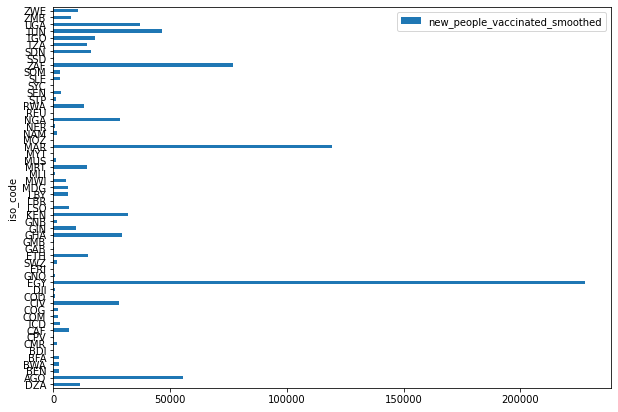

In [110]:
df[df.date == "2021-10-01"].plot.barh(x="iso_code", y="new_people_vaccinated_smoothed")

## Create samples for visualization

In [87]:
# View_bl: Scatter plot total infections vs. HDI etc.
df_scatter = df[~(df.iso_code == "OWID_AFR")]
df_scatter = df_scatter[["country", "population", "new_cases_per_million", 
                         "human_development_index", "gdp_per_capita", "extreme_poverty", "handwashing_facilities", 
                         "life_expectancy", "diabetes_prevalence"]]
tasks = {name: "first" for name in df_scatter.columns}
tasks.pop("country")
tasks["new_cases_per_million"] = "sum"
df_scatter = df_scatter.groupby(by="country").agg(tasks)
df_scatter = df_scatter.rename(columns={"new_cases_per_million": "total_cases_per_million"})
df_scatter = df_scatter.append(pd.Series([None]*df_scatter.columns.shape[0], index=df_scatter.columns, name="Western Sahara")) # Add one row only with NA
df_scatter.sort_index(inplace=True)
# df_scatter.to_csv("./data/scatter.csv", index=True)
df_scatter#.sort_values(by="human_development_index")

C:\Users\Felix\AppData\Local\Temp\ipykernel_22828\3449594280.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_scatter = df_scatter.append(pd.Series([None]*df_scatter.columns.shape[0], index=df_scatter.columns, name="Western Sahara")) # Add one row only with NA


,population,total_cases_per_million,human_development_index,gdp_per_capita,extreme_poverty,handwashing_facilities,life_expectancy,diabetes_prevalence
country,,,,,,,,
Algeria,44903228.0,3305.237,0.748,13913.839,0.5,83.741,76.88,6.73
Angola,35588996.0,1505.223,0.581,5819.495,NaN,26.664,61.15,3.94
Benin,13352864.0,1655.526,0.545,2064.236,49.6,11.035,61.77,0.99
Botswana,2630300.0,68676.193,0.735,15807.374,NaN,NaN,69.59,4.81
Burkina Faso,22673764.0,546.562,0.452,1703.102,43.7,11.877,61.58,2.42
Burundi,12889583.0,1512.692,0.433,702.225,71.7,6.144,61.58,6.05
Cameroon,27914542.0,2946.814,0.563,3364.926,23.8,2.735,59.29,7.20
Cape Verde,593162.0,49588.483,0.665,6222.554,NaN,NaN,72.98,2.42
Central African Republic,5579148.0,1053.541,0.397,661.240,NaN,16.603,53.28,6.10


In [91]:
# View_ur: Line chart of new cases (smoothed)
df_cases = df[["country", "date", "new_cases_smoothed_per_million"]]
df_cases = df_cases.pivot_table(values="new_cases_smoothed_per_million", index="country", columns="date")
# df_cases = pd.concat([df_cases.iloc[1:, :], pd.DataFrame(df_cases.iloc[0, :]).T]) # Add "Africa" to last position
# df_cases.to_csv("./data/cases.csv", index=True)
df_cases

date,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,...,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31
country,,,,,,,,,,,,,,,,,,,,,
Africa,7.515,7.584,7.583,7.903,8.413,8.406,8.564,8.764,8.898,9.195,...,4.126,3.968,3.942,3.933,3.982,4.000,3.995,3.883,3.824,3.788
Algeria,8.405,6.856,7.231,7.957,9.026,10.018,10.941,12.023,13.104,14.212,...,1.890,1.836,1.753,1.705,1.715,1.708,1.718,1.785,1.868,1.934
Angola,6.639,6.358,6.848,6.980,7.358,6.683,6.142,5.612,5.828,4.973,...,4.745,4.355,3.958,4.090,3.685,3.356,3.155,2.645,2.449,2.404
Benin,1.348,1.348,1.091,1.091,1.091,1.091,1.091,0.663,1.048,1.059,...,1.262,1.262,1.262,0.760,0.760,0.760,0.760,0.760,0.760,0.760
Botswana,39.050,39.050,19.498,19.498,64.794,64.794,64.794,64.794,64.794,64.794,...,166.358,105.040,105.040,105.040,90.973,90.973,90.973,90.973,70.388,70.388
Burkina Faso,0.365,0.403,0.428,0.460,0.447,0.410,0.384,0.403,0.328,0.296,...,0.674,0.372,0.258,0.895,0.680,0.680,0.680,0.680,0.680,0.680
Burundi,0.355,0.432,0.421,0.443,0.255,0.299,0.277,0.277,0.199,0.255,...,2.760,2.516,2.383,2.316,1.873,1.651,1.607,1.629,1.529,1.574
Cameroon,1.586,1.586,1.586,1.586,2.636,2.810,1.489,1.627,1.627,1.981,...,11.310,11.310,11.310,11.310,11.310,11.310,9.463,9.463,9.463,9.463
Cape Verde,108.860,110.546,113.676,121.624,131.499,127.645,119.938,125.478,129.331,133.666,...,29.382,24.566,22.880,24.084,23.843,23.843,20.953,19.990,21.435,18.545


In [94]:
# View_br: Line chart new vaccinations
df_vacc = df[["country", "date", "new_vaccinations_smoothed_per_million"]]
df_vacc = df_vacc.pivot_table(values="new_vaccinations_smoothed_per_million", index="country", columns="date")
# df_vacc = pd.concat([df_vacc.iloc[1:, :], pd.DataFrame(df_vacc.iloc[0, :]).T])
# df_vacc.to_csv("./data/vacc.csv", index=True)
df_vacc

date,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,...,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31
country,,,,,,,,,,,,,,,,,,,,,
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1082.0,1083.0,1078.0,1123.0,1175.0,1186.0,1201.0,1211.0,1227.0,1228.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,792.0,792.0,792.0,751.0,710.0,669.0,588.0,507.0,427.0,411.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4648.0,4150.0,3651.0,3322.0,2895.0,2297.0,2294.0,2292.0,2289.0,2286.0
Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117.0,117.0,117.0,117.0,117.0,117.0,117.0,170.0,223.0,277.0
Botswana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5075.0,4782.0,4489.0,4196.0,3903.0,3611.0,3317.0,3501.0,3685.0,3869.0
Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,244.0,244.0,244.0,591.0,937.0,1283.0,1630.0,1630.0,1631.0,1631.0
Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Cameroon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,58.0,55.0,51.0,51.0,51.0,44.0,37.0,31.0,24.0
Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4144.0,4678.0,5213.0,5203.0,5194.0,5184.0,5176.0,4859.0,4543.0,4227.0
